In [6]:
import yfinance as yf

ativo = "GE"
df = yf.download(ativo, start='2019-09-10', end='2019-10-09')

dados_do_ativo = df
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-10,55.644028,57.892273,55.581577,57.080406,56.124916,10026579
2019-09-11,57.142857,58.454334,56.580795,58.454334,57.475842,9142321
2019-09-12,58.704136,59.453552,57.580017,57.829819,56.861786,10906930
2019-09-13,58.142078,59.016392,57.080406,58.329430,57.415035,7300003
2019-09-16,58.079624,58.829041,57.267761,58.579235,57.660931,7325463


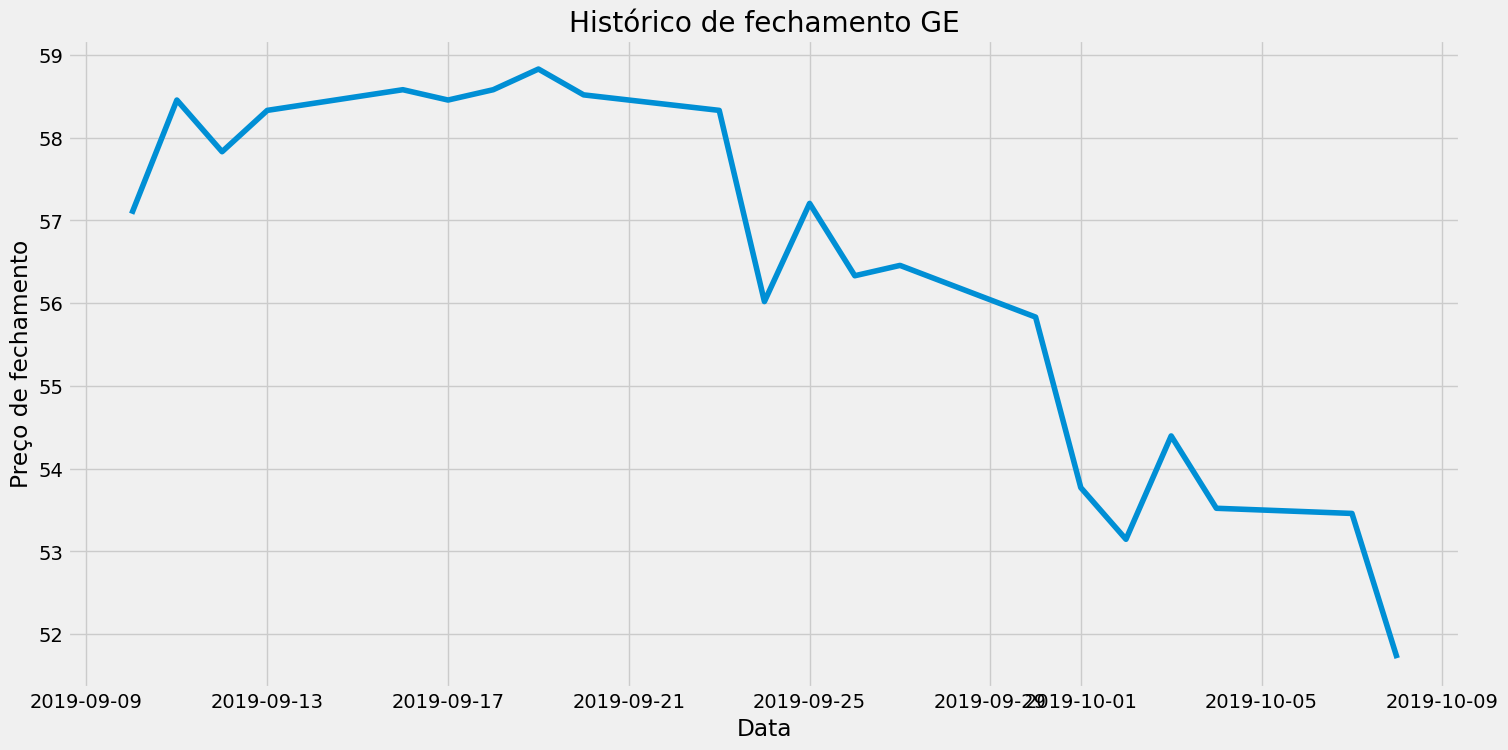

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# plt.style.use('default')

plt.figure(figsize=(16,8))
plt.title('Histórico de fechamento ' + ativo)
plt.plot(dados_do_ativo['Close'])
plt.xlabel('Data')
plt.ylabel('Preço de fechamento')
plt.show()


In [8]:
cotacoes_df = dados_do_ativo.filter(['Close'])
cotacoes = cotacoes_df.values

from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler(feature_range=(0, 1))
cotacoes_normalizadas = normalizador.fit_transform(cotacoes)

In [9]:
from math import ceil

dias_treinamento = ceil( len(cotacoes) * .8)
cotacoes_treinamento = cotacoes_normalizadas[0:dias_treinamento]

x_treino=[]
y_treino = []

for i in range(30,len(cotacoes_treinamento)):
    x_treino.append(cotacoes_treinamento[i-30:i])
    y_treino.append(cotacoes_treinamento[i])


import numpy as np

x_treino, y_treino = np.array(x_treino), np.array(y_treino)

x_treino = np.reshape(x_treino, (len(x_treino),30,1))

x_treino


array([], shape=(0, 30, 1), dtype=float64)

In [10]:
y_treino

array([], dtype=float64)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(30,1)))
model.add(LSTM(units=50, return_sequences=False))

model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


2023-12-02 23:03:11.039656: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-02 23:03:11.533624: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 23:03:11.533721: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 23:03:11.876121: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 23:03:12.067629: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-02 23:03:12.075111: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [12]:
model.fit(x_treino, y_treino, batch_size=1, epochs=1)


ValueError: Expected input data to be non-empty.

In [ ]:
cotacoes_teste = cotacoes_normalizadas[dias_treinamento - 30:]

x_teste = []
y_teste =  cotacoes[dias_treinamento:]
for i in range(30,len(cotacoes_teste)):
    x_teste.append(cotacoes_teste[i-30:i])


x_teste = np.array(x_teste)
x_teste = np.reshape(x_teste, (len(x_teste),30,1))


In [ ]:
predictions = model.predict(x_teste)

predictions = normalizador.inverse_transform(predictions)


In [ ]:
rmse=np.sqrt(np.mean(((predictions- y_teste)**2)))
rmse


In [ ]:
treino = cotacoes_df[:dias_treinamento]
valido = cotacoes_df[dias_treinamento:]
valido['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Ativo ' + ativo)
plt.xlabel('Data')
plt.ylabel('Preço de fechamento (R$)')
plt.plot(treino['Close'], color = 'black')
plt.plot(valido['Close'], color = 'green')
plt.plot(valido['Predictions'], color = 'red')
plt.legend(['Historico', 'Valor real', 'Predição'])
plt.show()


In [ ]:
dados_do_ativo = dados.DataReader(ativo, start="2021-08-23",end="2021-10-05", data_source='yahoo')

x = dados_do_ativo.filter(['Close'])
x = normalizador.fit_transform(x)
x = np.array(x)[:-1] # remover o dia 05/10
x = np.reshape(x, (1,30,1))

prediction = model.predict(x)

prediction = normalizador.inverse_transform(prediction)
real = dados_do_ativo.filter(['Close']).values[-1]

print('pedição: ',prediction)
print('real: ',real)


pedição:  [[85.03331]]
real:  [94.]
